In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from json import loads
import os
import glob
import datetime
import re

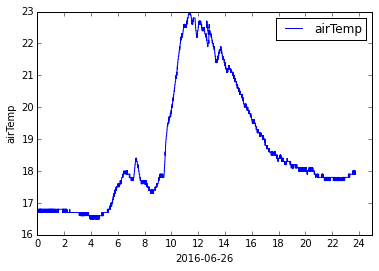

In [28]:
def get_points(x, y ,d):
    path = 'old-stuff/fishy-wifi-master/wegrow-web/wegrow-data1/wegrow-data/WaterElf-10878526'
    chosen_file = [i for i in os.listdir(path) if os.path.isfile(os.path.join(path,i)) and d in i]
    for filename in chosen_file:
        #print(filename)
        data={}
        with open(os.path.join(path, filename),'r') as f:
            
            for line in f:
                new_dict = loads(line.strip())
                for k in new_dict:
                    if k in data:
                        data[k].append(float(new_dict[k]))
                    else:
                        data[k] = [float(new_dict[k])]

        #array = np.array([data[x], data[y]])
        if len(data[x]) != len(data[y]):
                print ('Unable to produce graph!')
                continue
        if x == 'timestamp':
            timestamp = data[x]
            date = re.search("([0-9]{4}\-[0-9]{2}\-[0-9]{2})", filename)
            #print (date)
            x = date.group(0)
            year = x[0:4]
            month = x[5:7]
            day = x[8:10]
            fileStartDate = datetime.datetime(int(year),int(month),int(day),0,0)
            #print("file starts at: " + str(fileStartDate))
            startTimeStamp = timestamp[0]
            #print (startTimeStamp)

            increment = 0
            previous = 0
            timeAtT_list = []
            for index,times in enumerate(timestamp):
                if timestamp[index-1] > timestamp[index] and increment==0 and index!=0:   
                    increment = timestamp[index-1]
                    previous += increment                                             
                times += previous                
                delta = datetime.timedelta(0, (times - startTimeStamp) / 1000)
                timeAtT = delta
                #total_sec is required since need to put float into empty list,but any better way?This doesnt show accurate time
                timeAtT_float = timeAtT.total_seconds()
                timeAtT_exacttime_float = timeAtT_float/3600
                timeAtT_list.append(timeAtT_exacttime_float)
            timestamp = timeAtT_list
            data[x]=timestamp
            
            #print (data[x])
            
        #print("time at t=" + str(times) + " is: " + str(timeAtT))  
        #plt.plot(array[0], array[1],label=y)
        plt.plot(data[x],data[y],label=y)
        plt.xlabel(x)
        plt.ylabel(y)
        xticks = np.arange(0,25,2)
        plt.xticks(xticks)
        plt.legend(loc='best')
        plt.show()
    
get_points('timestamp', 'airTemp','06-26')